## 세부 분석

집단별 언제 푸시알림을 보내는게 가장 효과적일까?
- 고객 집단별 구매를 많이 하는 시간(purchase)
- 고객 집단별  시간대별로 많이 구매한 제품의 카테고리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

In [27]:
# 데이터는 a3에서 가져옴
# df_merged = pd.merge(df2, rfm, on='user_id', how='inner')를 통해서 합쳐줬음
# Unnamed: 0 컬럼 없애주기
df = pd.read_csv('df_merged.csv', usecols=lambda col: col != 'Unnamed: 0')
df.shape

(20576, 16)

In [28]:
df['event_time'] = pd.to_datetime(df['event_time']).astype('datetime64[ns]')

C:\Users\신하진\AppData\Local\Temp\ipykernel_12512\931612318.py:1: FutureWarning: Using .astype to convert from timezone-aware dtype to timezone-naive dtype is deprecated and will raise in a future version.  Use obj.tz_localize(None) or obj.tz_convert('UTC').tz_localize(None) instead
  df['event_time'] = pd.to_datetime(df['event_time']).astype('datetime64[ns]')


In [29]:
df.dtypes

event_time       datetime64[ns]
event_type               object
product_id                int64
category_code            object
brand                    object
price                   float64
user_id                   int64
Recency                   int64
Frequency                 int64
MonetaryValue           float64
R                         int64
F                         int64
M                         int64
RFM_segment               int64
RFM_score                 int64
RFM_class                object
dtype: object

In [30]:
df.head()

,event_time,event_type,product_id,category_code,brand,price,user_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
0,2019-10-23 16:38:27,purchase,1005204,electronics.smartphone,xiaomi,156.47,512564650,9,1,156.47,4,1,2,412,7,silver
1,2019-10-09 14:25:09,purchase,1005118,electronics.smartphone,apple,1015.20,512736880,23,1,1015.20,2,1,5,215,8,silver
2,2019-10-10 04:55:02,purchase,1003316,electronics.smartphone,apple,931.79,526929354,14,6,5536.02,3,5,5,355,13,platinum
3,2019-10-01 16:24:57,purchase,1004246,electronics.smartphone,apple,733.46,526929354,14,6,5536.02,3,5,5,355,13,platinum
4,2019-10-10 06:15:20,purchase,1003316,electronics.smartphone,apple,931.79,526929354,14,6,5536.02,3,5,5,355,13,platinum


### 고객 집단별 구매를 많이 하는 시간  

In [31]:
# 날짜는 2019.10.01~ 2019.10.31
print(df['event_time'].max(), df['event_time'].min())

2019-10-31 23:49:19 2019-10-01 00:07:07


In [32]:
# 모두 2019년 10월 이므로 날, 요일만 만들어줌
df["day"] = df['event_time'].dt.day
df["dow"] = df['event_time'].dt.dayofweek
df['hour'] = df['event_time'].dt.hour
df.head(1)

,event_time,event_type,product_id,category_code,brand,price,user_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,day,dow,hour
0,2019-10-23 16:38:27,purchase,1005204,electronics.smartphone,xiaomi,156.47,512564650,9,1,156.47,4,1,2,412,7,silver,23,2,16


In [54]:
df[df['day'] == 31]

,event_time,event_type,product_id,category_code,brand,price,user_id,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,day,dow,hour
46,2019-10-31 17:29:36,purchase,1004870,electronics.smartphone,samsung,275.28,548123970,1,2,790.06006,5,5,5,555,15,platinum,31,3,17
73,2019-10-31 07:48:46,purchase,1005105,electronics.smartphone,apple,1349.44,516123862,1,1,1349.44000,5,2,5,525,12,platinum,31,3,7
77,2019-10-31 08:01:16,purchase,1004768,electronics.smartphone,samsung,242.79,566030401,1,1,242.79000,5,5,3,553,13,platinum,31,3,8
83,2019-10-31 14:33:34,purchase,1802005,electronics.video.tv,lg,437.15,531163717,1,1,437.15000,5,3,4,534,12,platinum,31,3,14
89,2019-10-31 05:09:56,purchase,43800001,furniture.kitchen.table,genau,127.39,565431133,1,2,254.78000,5,5,3,553,13,platinum,31,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20530,2019-10-31 06:39:53,purchase,1004856,electronics.smartphone,samsung,130.99,565998174,1,1,130.99000,5,5,2,552,12,platinum,31,3,6
20543,2019-10-31 13:58:29,purchase,1004767,electronics.smartphone,samsung,242.70,566138004,1,1,242.70000,5,5,3,553,13,platinum,31,3,13
20552,2019-10-31 05:01:51,purchase,1003316,electronics.smartphone,apple,928.39,530677949,1,1,928.39000,5,3,5,535,13,platinum,31,3,5
20564,2019-10-31 03:09:33,purchase,1005151,electronics.smartphone,xiaomi,405.95,539921763,1,1,405.95000,5,3,4,534,12,platinum,31,3,3


In [33]:
df['RFM_class'].unique()

array(['silver', 'platinum', 'gold'], dtype=object)

In [34]:
df['hour'].unique()

array([16, 14,  4,  6, 15, 17,  8,  7, 21,  0, 10,  3, 19, 12, 20, 11,  9,
       23,  2,  5, 22, 13, 18,  1], dtype=int64)

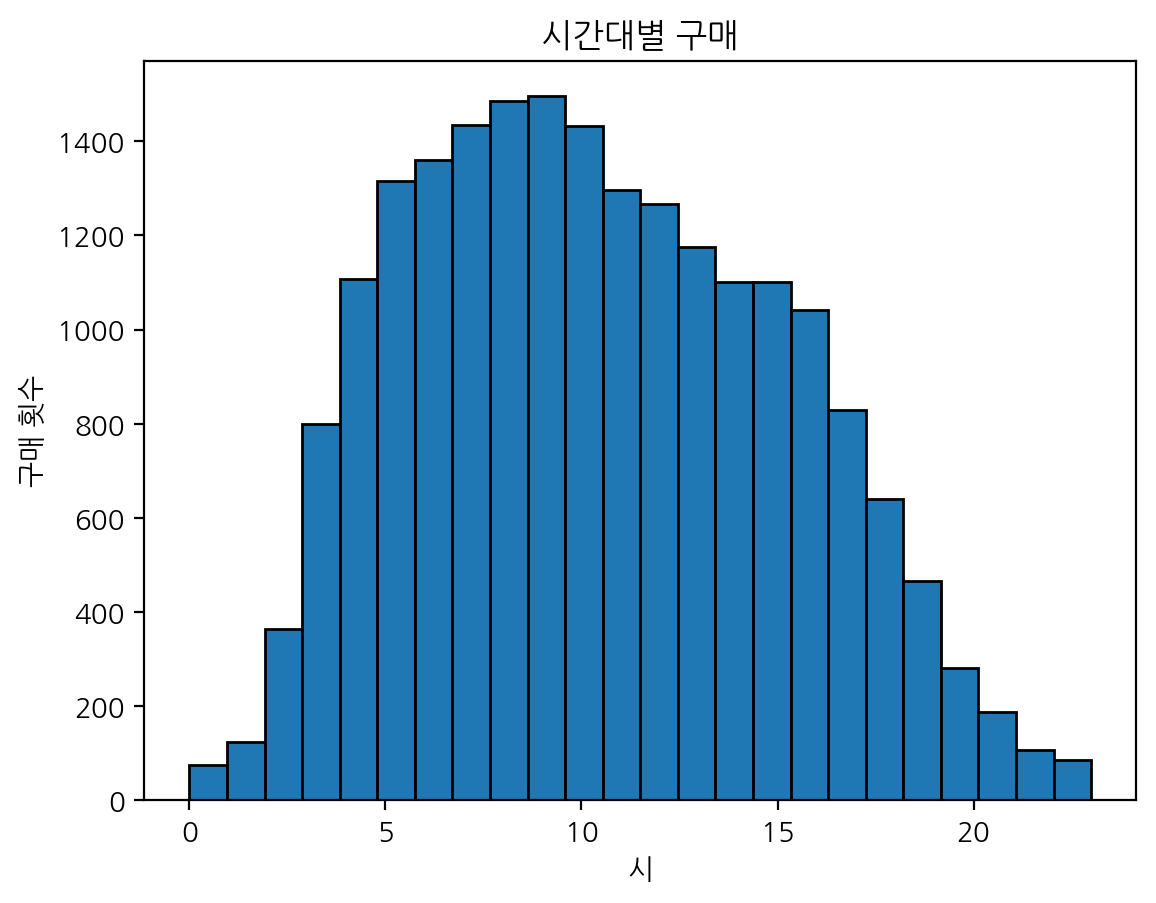

In [35]:
# 전체 집단에서 구매가 가장 많은 시간 시각화
# 테두리가 안보여서 edgecolor를넣음
plt.hist(df['hour'], bins=24, edgecolor='black')
plt.xlabel('시')
plt.ylabel('구매 횟수')
plt.title('시간대별 구매')
plt.show()

# 의외로 출근후~ 점심식사 전이 가장 많음(출근해서 쇼핑하는듯)

In [36]:
# 집단별로 hour, count로 groupby
df_hour = df.groupby(['RFM_class', 'hour'])['event_type'].count().reset_index(name='count')
df_hour

,RFM_class,hour,count
0,gold,0,27
1,gold,1,23
2,gold,2,91
3,gold,3,194
4,gold,4,279
...,...,...,...
67,silver,19,190
68,silver,20,92
69,silver,21,68
70,silver,22,29


In [37]:
# 집단별로 나눠서 변수지정

gold = df_hour[df_hour['RFM_class'] == 'gold']
silver = df_hour[df_hour['RFM_class'] == 'silver']
platinum = df_hour[df_hour['RFM_class'] == 'platinum']

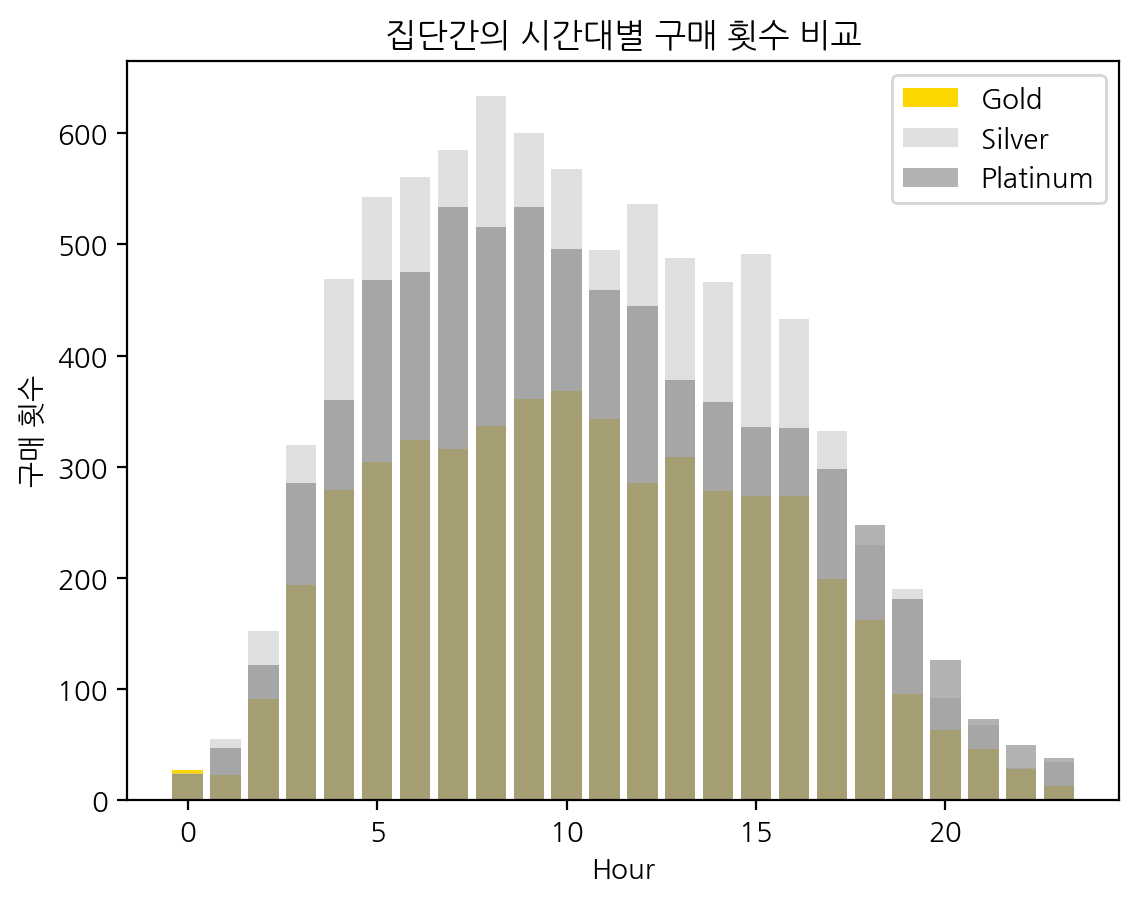

In [43]:
# 서브플롯을 사용해서 한번에 겹쳐그리기
# alpha로 투명도를 조절함

fig, ax = plt.subplots()

ax.bar(gold['hour'], gold['count'], color='gold', alpha=1, label='Gold')
ax.bar(silver['hour'], silver['count'], color='silver', alpha=0.5, label='Silver')
ax.bar(platinum['hour'], platinum['count'], color='gray', alpha=0.6, label='Platinum')

ax.set_xlabel('Hour')
ax.set_ylabel('구매 횟수')
ax.set_title('집단간의 시간대별 구매 횟수 비교')
ax.legend()

plt.show()

In [15]:
df[df['RFM_class'] == 'gold'].shape, df[df['RFM_class'] == 'silver'].shape, df[df['RFM_class'] == 'platinum'].shape

((4994, 19), (8396, 19), (7186, 19))

### 고객 집단별 시간대별로 많이 구매한 제품의 카테고리

In [16]:
# 카테고리가 생각보다 많음
df['category_code'].nunique()

103

In [17]:
# 집단별로 시간, 카테고리 코드, 횟수를 groupby해줌
df_count = df.groupby(['RFM_class', 'hour', 'category_code']).size().reset_index(name='count')
df_count

,RFM_class,hour,category_code,count
0,gold,0,apparel.scarf,1
1,gold,0,appliances.kitchen.washer,1
2,gold,0,computers.notebook,1
3,gold,0,electronics.audio.headphone,2
4,gold,0,electronics.clocks,3
...,...,...,...,...
2219,silver,23,electronics.audio.headphone,3
2220,silver,23,electronics.clocks,2
2221,silver,23,electronics.smartphone,14
2222,silver,23,electronics.video.tv,2


In [18]:
#각각의 그룹으로 나눠줌
df_count_gold = df_count[df_count['RFM_class'] == 'gold']
df_count_silver = df_count[df_count['RFM_class'] == 'silver']
df_count_platinum = df_count[df_count['RFM_class'] == 'platinum']
df_count_gold

,RFM_class,hour,category_code,count
0,gold,0,apparel.scarf,1
1,gold,0,appliances.kitchen.washer,1
2,gold,0,computers.notebook,1
3,gold,0,electronics.audio.headphone,2
4,gold,0,electronics.clocks,3
...,...,...,...,...
619,gold,23,appliances.environment.vacuum,1
620,gold,23,computers.peripherals.monitor,1
621,gold,23,electronics.audio.headphone,1
622,gold,23,electronics.clocks,1


In [19]:
# 어떤제품이 가장많은지 대충 살펴봄
df_count_gold.sort_values(by='count', ascending=False)

,RFM_class,hour,category_code,count
266,gold,9,electronics.smartphone,237
301,gold,10,electronics.smartphone,227
337,gold,11,electronics.smartphone,223
235,gold,8,electronics.smartphone,217
399,gold,13,electronics.smartphone,216
...,...,...,...,...
281,gold,10,appliances.kitchen.oven,1
280,gold,10,appliances.kitchen.mixer,1
279,gold,10,appliances.kitchen.microwave,1
273,gold,9,kids.fmcg.diapers,1


In [20]:
# 첫번째 인덱스에 무엇인지(가장 많이 팔린 제품이니까)
df_count_gold['category_code'].value_counts().index[0]

'electronics.smartphone'

In [21]:
# 0시일때 가장 많이 팔린 제품
df_count_gold[df_count_gold['hour'] == 0].sort_values(by='count', ascending=False)['category_code'].iloc[0]

'electronics.smartphone'

In [22]:
# 반복문을 사용해서 0~23시까지의 카테고리 코드중 가장 많이 팔린 제품을 출력
# idxmax()는 Pandas Series나 DataFrame에서 가장 큰 값을 가진 index를 반환하는 메소드임
for hour in range(0, 24):
    hour_n = df_count_gold[df_count_gold['hour'] == hour]
    result = hour_n.loc[hour_n['count'].idxmax(), 'category_code']
    print(f"{hour}: {result}")

0: electronics.smartphone
1: electronics.smartphone
2: electronics.smartphone
3: electronics.smartphone
4: electronics.smartphone
5: electronics.smartphone
6: electronics.smartphone
7: electronics.smartphone
8: electronics.smartphone
9: electronics.smartphone
10: electronics.smartphone
11: electronics.smartphone
12: electronics.smartphone
13: electronics.smartphone
14: electronics.smartphone
15: electronics.smartphone
16: electronics.smartphone
17: electronics.smartphone
18: electronics.smartphone
19: electronics.smartphone
20: electronics.smartphone
21: electronics.smartphone
22: electronics.smartphone
23: electronics.smartphone


In [23]:
# 첫번째는 electronics.smartphone이라서 의미없어서 2번째것을 가져옴

for hour in range(0, 24):
    hour_n = df_count_gold[df_count_gold['hour'] == hour]
    result = hour_n.nlargest(2, 'count')['category_code'].iloc[1]
    print(f"{hour}: {result}")

0: electronics.clocks
1: apparel.shoes.keds
2: electronics.video.tv
3: electronics.video.tv
4: electronics.audio.headphone
5: electronics.video.tv
6: electronics.audio.headphone
7: electronics.audio.headphone
8: appliances.kitchen.refrigerators
9: electronics.audio.headphone
10: computers.notebook
11: electronics.video.tv
12: electronics.audio.headphone
13: electronics.video.tv
14: electronics.video.tv
15: electronics.clocks
16: computers.notebook
17: computers.notebook
18: electronics.audio.headphone
19: electronics.audio.headphone
20: computers.notebook
21: electronics.audio.headphone
22: electronics.clocks
23: apparel.shoes


In [44]:
df_count.style.background_gradient()

,RFM_class,hour,category_code,count
0,gold,0,apparel.scarf,1
1,gold,0,appliances.kitchen.washer,1
2,gold,0,computers.notebook,1
3,gold,0,electronics.audio.headphone,2
4,gold,0,electronics.clocks,3
5,gold,0,electronics.smartphone,17
6,gold,0,electronics.video.tv,2
7,gold,1,apparel.shoes.keds,1
8,gold,1,appliances.ironing_board,1
9,gold,1,appliances.kitchen.washer,1


<AxesSubplot: xlabel='RFM_class', ylabel='hour'>

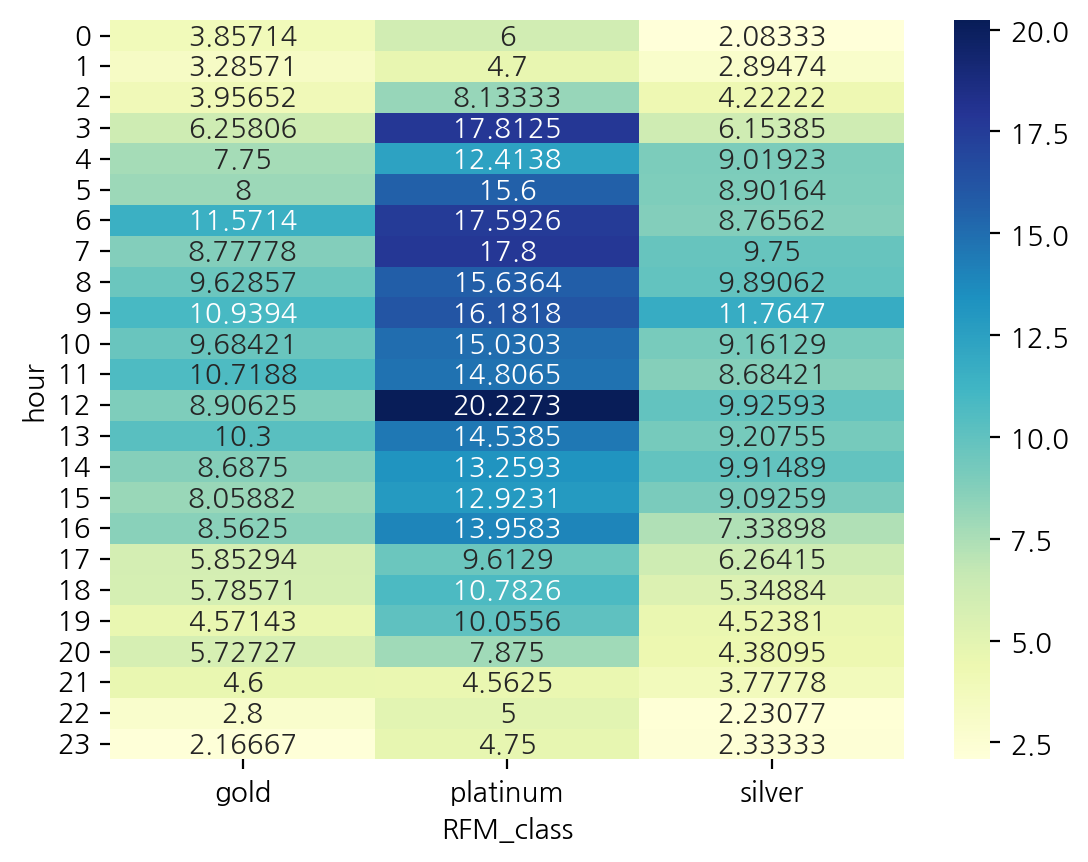

In [46]:
# 피봇 테이블 생성
pivot_table = pd.pivot_table(df_count, values='count', index='hour', columns='RFM_class')

# heatmap 생성
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='g')